# Neural Networks - Backpropagagation & Testing
### Notebook Author: Nirupam Purushothama
## Section: 1 : Introduction

It is assumed that the reader (of this notebook) knows that backpropagation is used to train a neural network (i.e. adjust the weights of the network as it learns from the data). If not then I would advise the reader to complete an introductory lesson on DNN and then come here.

Refer to this [wiki](https://en.wikipedia.org/wiki/Backpropagation#Finding_the_derivative_of_the_error) for more details. 
Formulating the gradients for the weights. Defining it in a recursive way.

The following figure is representative of one node in the deep neural network.

![sample_ann](sample_ann.png)

Definitions for the terms used for this diagram are as follows:
* $E$ = Total error
* $w_{ij}$ = Weight from node i to node j
* $net_j$ = Sum product of the weights and the inputs + bias for the jth node
* $out_j$ = Activation function (Sigmoid) in this case applied to $net_j$
* $o_j$ = Output of jth node
* $L$ = Is the set of nodes in the layer after the the current present

${\frac {\partial E}{\partial w_{ij}}}={\frac {\partial E}{\partial o_{j}}}{\frac {\partial o_{j}}{\partial {\text{net}}_{j}}}{\frac {\partial {\text{net}}_{j}}{\partial w_{ij}}}$

$\delta _{j}={\frac {\partial E}{\partial o_{j}}}{\frac {\partial o_{j}}{\partial {\text{net}}_{j}}}={\begin{cases}(o_{j}-y_{j})&{\text{if }}j{\text{ is an output neuron,}}\\(\sum _{\ell \in L}w_{j \ell}\delta _{\ell })o_{j}(1-o_{j})&{\text{if }}j{\text{ is an inner neuron.}}\end{cases}}$

The above formulation helps us to recursively compute the derivative at this node 

from the values computed from the next layer (i.e. previous layer in the backward pass)

## Section: 2 : Derivations for Given Network

This is the given network we want to create and train.

**Given network:**

![neural_net](neuralnet.jpg)

**2.1. Equations provided:**

$W^{[1]}x+b^{[1]} = z^{[1]}, a^{[1]} = g(z^{[1]})$

$W^{[2]}x+b^{[2]} = z^{[2]}, a^{[2]} = g(z^{[2]})$

$W^{[3]}x+b^{[3]} = z^{[3]}, a^{[3]} = g(z^{[3]})$

**2.2. net and out equations for the layers:**

##### Layer 1:

$net\ n^1_1 = W^1_{11}x_1 + W^1_{21}x_2 + ... + W^1_{d1}x_d + b_1^1$

$a_1^1 = out\ n^1_1 = \frac{1}{1 + e^{-net\ n^1_1}}$

#####  Layer 2:

$net\ n^2_1 = W^2_{11}a_1^1 + W^2_{21}a^1_2 + ... + W^2_{h_11}a^1_{h_1} + b_1^2$

$a_1^2 = out\ n^2_1 = \frac{1}{1 + e^{-net\ n^2_1}}$

##### Layer 3:

$net\ n^3_1 = W^3_{11}a_1^2 + W^3_{21}a_2^2 + ... + W^3_{h_21}a^2_{h_2} + b_1^3$

$a_1^3 = out\ n^3_1 = \frac{1}{1 + e^{-net\ n^3_1}}$

**2.3. Loss Function**

$\varepsilon_{total} = -\sum_{i=1}^{m} y\ log\ a^3_1 + (1-y) log(1-a^3_1)$

Here, the activation function is sigmoid function

**2.4. Defintions**

$W_{ij}^l$ is Weight between nodes i and j and $l$ indicates the layer (of weights). Where,
* node i is from layer $l$-1
* node j is from layer $l$

For each of the cases below, we derive the derivative w.r.t the first weight of that layer and then generalize it to all nodes.

**2.5. Computing Derivaties for Layers**

#####  2.5.1. Layer 3:

$\frac{\partial \varepsilon_{total}}{\partial W_{11}^3} = \frac{\partial \varepsilon_{total}}{\partial a_1^3} * \frac{\partial a^3_1}{\partial net\ n^3_1} * \frac{\partial net\ n^3_1}{\partial W^3_{11}}$

= $(a^3_1-y)\ out\ n^2_1$ = $(a^3_1-y)\ a^2_1$

**_NOTE:_** Derivatives for layer-3

Generalizing ($W^3_{ij} =$ (level $l-1$) node-i's jth weight) - For layer 3, j is all 1 (because there is only one final output)

$\frac{\partial \varepsilon_{total}}{\partial W_{i1}^3} = (a^3_1-y)\ a^2_i$ 

$\frac{\partial \varepsilon_{total}}{\partial b_{i1}^3} = (a^3_1-y)$


##### 2.5.2. Layer 2:

$\frac{\partial \varepsilon_{total}}{\partial W_{11}^2} = \frac{\partial \varepsilon_{total}}{\partial a_1^2} * \frac{\partial a^2_1}{\partial net\ n^2_1} * \frac{\partial net\ n^2_1}{\partial W^2_{11}}$

Looking at each of the segments:

$\frac{\partial net\ n^2_1}{\partial W^2_{11}} = out\ n^1_1 = a_1^1$

$\frac{\partial a^2_1}{\partial net\ n^2_1} = a^2_1\ (1 - a^2_1) \rightarrow Eq\ (1)$

$\frac{\partial \varepsilon_{total}}{\partial a_1^2} = \frac{\partial \varepsilon_{total}}{\partial net_1^3} * \frac{\partial net_1^3}{\partial a^2_1} = \frac{\partial \varepsilon_{total}}{\partial out_1^3} * \frac{\partial out_1^3}{\partial net_1^3} * \frac{\partial net_1^3}{\partial a^2_1} = \frac{\partial \varepsilon_{total}}{\partial a_1^3} * \frac{\partial a_1^3}{\partial net_1^3} * \frac{\partial net_1^3}{\partial a^2_1} \rightarrow Eq\ (2)$

$\frac{\partial net\ n^3_1}{\partial a^2_1} = W_{11}^3$

$\frac{\partial a_1^3}{\partial net\ n^3_1} = a_1^3 (1 - a_1^3)$

$\frac{\partial \varepsilon_{total}}{\partial a_1^3} = \frac{(a_1^3 - y)}{a^3_1 (1-a^3_1)} \rightarrow Eq\ (3)$ 

Multiplying Equations (1), (2) and (3):

$\frac{\partial \varepsilon_{total}}{\partial W_{11}^2} = [W_{11}^3 * (a^3_1 - y)] * [a_1^2 * (1-a_1^2)] * a_1^1$

**_NOTE:_** Derivatives for Layer-2

Generalizing ($W^2_{ij} =$ ($l$-1 level) node-i's jth weight)

$\frac{\partial \varepsilon_{total}}{\partial W_{ij}^2} = [W_{j1}^3 * (a^3_1 - y)] * [a_j^2 * (1-a_j^2)] * a_i^1$

$\frac{\partial \varepsilon_{total}}{\partial b_{ij}^2} = [W_{j1}^3 * (a^3_1 - y)] * [a_j^2 * (1-a_j^2)]$

##### 2.5.3. Layer 1:

Partial derivate w.r.t any internal weight is as follows:

$\frac{\partial \varepsilon_{total}}{\partial W_{11}^1} = \frac{\partial \varepsilon_{total}}{\partial a_1^1} * \frac{\partial a^1_1}{\partial net\ n^1_1} * \frac{\partial net\ n^1_1}{\partial W^1_{11}}$

Looking at each of the segments:

$\frac{\partial net\ n^1_1}{\partial W^1_{11}} = X_1$

$\frac{\partial a^1_1}{\partial net\ n^1_1} = a^1_1\ (1 - a^1_1)$ 

Now we take $\varepsilon_{total}$ as a function of next level nodes:

$\frac{\partial \varepsilon_{total}}{\partial a_1^1} = \frac{\partial \varepsilon_{total}(net\ n^2_1, net\ n^2_2, ..., net\ n^2_{h_2})}{\partial a_1^1}$ 

$= \sum_{l\in L}\frac{\partial \varepsilon_{total}}{\partial net_{n^2_l}} * \frac{\partial net_{n^2_l}}{\partial a_1^1}$

$= \sum_{l\in L}\frac{\partial \varepsilon_{total}}{\partial out_{n^2_l}} * \frac{\partial out_{n^2_l}}{\partial net_{n^2_l}} * \frac{\partial net_{n^2_l}}{\partial a_1^1}$

$= \sum_{l\in L}\frac{\partial \varepsilon_{total}}{\partial out_{n^2_l}} * \frac{\partial out_{n^2_l}}{\partial net_{n^2_l}} * W^2_{1l}$

$= \sum_{l\in L}\frac{\partial \varepsilon_{total}}{\partial out_{n^2_l}} * \frac{\partial out_{n^2_l}}{\partial net_{n^2_l}} * W^2_{1l}$

$= \sum_{l\in L}\frac{\partial \varepsilon_{total}}{\partial a^2_l} * \frac{\partial a^2_l}{\partial net_{n^2_l}} * W^2_{1l}$

$= (a^3_1 - y) * \sum_{l\in L} (1-a^2_l) * a^2_l * W^2_{1l} * W^3_{l1}$

Putting it all together:

$\frac{\partial \varepsilon_{total}}{\partial W_{11}^1} = X_1 * a^1_1 * (1 - a^1_1) * (a^3_1 - y) * \sum_{l\in L} (1-a^2_l) * a^2_l * W^2_{1l} * W^3_{l1}$

where $L$ is the set of all nodes $n_k^2\ where\ k \in (1,h_2)$

**_NOTE:_** Derivatives for Layer-1

Generalizing ($W^1_{ij} =$ ($l$-1 level) node-i's jth weight)

$\frac{\partial \varepsilon_{total}}{\partial W_{ij}^1} = X_i * a^j_1 * (1 - a^j_1) * (a^3_1 - y) * \sum_{l\in L} (1-a^2_l) * a^2_l * W^2_{jl} * W^3_{l1}$

$\frac{\partial \varepsilon_{total}}{\partial b_{ij}^1} = a^j_1 * (1 - a^j_1) * (a^3_1 - y) * \sum_{l\in L} (1-a^2_l) * a^2_l * W^2_{jl} * W^3_{l1}$

## Section: 3 : Neural Network Code
* Create a network (using three objects Neuron, Layers and DNN)
* Train the network (using forward and backward passes) using Stochastic Gradient Descent
* Check the final accuracy on the test set

Accuracy on test set:  85.48 %


<IPython.core.display.Javascript object>


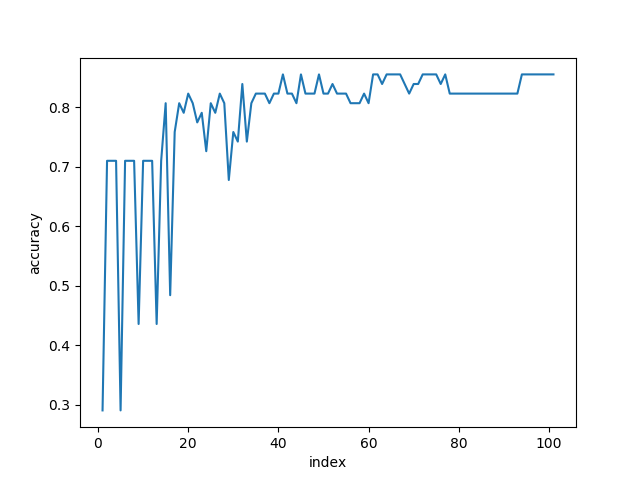

In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('./sa.data')
data = data.drop(columns=['row.names'])
learning_rate = 0.1

class neuron(object):
    def __init__(self, nInputs, nodeId):
        self.num_inputs = nInputs
        self.node_id = nodeId
        self.initialize()
        
    def initialize(self):
        # Index starts from 0. Bias is the last weight
        self.inputs = np.repeat(0,self.num_inputs+1)
        np.append(self.inputs, 1)
        
        #self.weights = np.random.rand(self.num_inputs+1)
        #self.weights = 1 - self.weights
        self.weights = np.random.uniform(-0.5,0.5,self.num_inputs+1)
        
        self.delta = 0
        bias = np.random.randn()
        
    def print_node(self):
        print(">B-Node")
        print("Node-id: ", self.node_id)
        print("Num-inputs: ", len(self.inputs))
        print("Num-weights: ", len(self.weights))
        print("Inputs: ", self.inputs)
        print("Weights: ", self.weights)
        print("Delta: ", self.delta)
        print("Net: ", self.net)
        print("Out: ", self.out)
        print(">E-Node")
            
        return
        
    
    # Setters and Getters
    def set_inputs(self, inputs):            
        if(len(inputs) != self.num_inputs):
            print("Wrong Input provided.")
            return
        
        self.inputs = np.array(inputs)
        self.inputs = np.append(self.inputs, 1)
        return
    
    def get_output(self):
        return self.out
    
    def get_delta(self):
        return self.delta
    
    def get_weight(self, index):
        return self.weights[index]
    
    def get_weighted_delta(self, index):
        return self.weights[index]*self.delta
    
    ## Forward pass
    def compute_forward(self):
        self.calculate_net()
        self.calculate_out()
        return
    
    def calculate_net(self):
        self.net = self.weights.dot(self.inputs)
        return
    
    # Apply the sigmoid function
    def calculate_out(self):
        self.out = 1 / (1 + np.exp(-self.net))
        return
    
    ## Backward pass 
    ## Bias calculation is taken care of the regular calculations
    def calculate_delta(self, next_layer = None, actual_op = None):
        # Then it is a output layer
        if(next_layer is None):
            self.delta = (self.out - actual_op)
        else:
            self.delta = next_layer.get_weighted_delta_sum(self.node_id) * self.out * (1-self.out)
        
        return
    
    def calculate_derivatives(self, next_layer = None, actual_op = None):
        self.calculate_delta(next_layer, actual_op)
        self.derivatives = self.inputs * self.delta
        
        return
    
    def compute_backward(self, next_layer = None, actual_op = None):
        self.calculate_derivatives(next_layer, actual_op)
        #self.weights -= learning_rate * self.derivatives
        
        return
    
    def apply_gradients(self):
        self.weights -= learning_rate * self.derivatives
        return
    
    
class layer(object):
    def __init__(self, nNodes, nInputs):
        self.num_nodes = nNodes
        self.num_inputs = nInputs
        self.nodes = [neuron(nInputs, i) for i in range(nNodes)]
        
    def print_layer(self):
        print("####Start Layer#####")
        print("Number of nodes:", self.num_nodes)
        for i in range(self.num_nodes):
            self.nodes[i].print_node()
        print("####End of Layer####")
            
        return
        
    def get_weighted_delta_sum(self, input_node_id=0):
        weighted_sum = 0
        
        for i in range(self.num_nodes):
            weighted_sum += self.nodes[i].get_weighted_delta(input_node_id)
            
        return weighted_sum
    
    ## Setters and Getters
    def assign_inputs(self, inputs):
        for i in range(self.num_nodes):
            self.nodes[i].set_inputs(inputs)
  
        return
    
    def get_layeroutputs(self):
        outputs = [self.nodes[i].get_output() for i in range(self.num_nodes)]
        return np.array(outputs)
    
    ## Forward and Backward pass
    def forward_pass(self):
        for i in range(self.num_nodes):
            self.nodes[i].compute_forward()
        return
    
    def backward_pass(self, next_layer = None, actual_op = None):
        for i in range(self.num_nodes):
            self.nodes[i].compute_backward(next_layer, actual_op)
            
        return
            
    def apply_gradients(self):
        for i in range(self.num_nodes):
            self.nodes[i].apply_gradients()
            
        return
    
class DNN(object):
    def __init__(self):
        return
    
    def print_network(self):
        print(">>>Printing Network<<<")
        print("Number of layers:", self.num_layers)
        for i in range(self.num_layers):
            self.layers[i].print_layer()
            
        return
    
    def initialize(self, nLayers, nodesPerLayerList, nTotalInputs):
        self.num_layers = nLayers
        self.num_nodes_per_layer_list = nodesPerLayerList
        inputs_num_list = [nTotalInputs] + nodesPerLayerList[0:len(nodesPerLayerList)-1]
        self.layers = [layer(nodesPerLayerList[i], inputs_num_list[i]) for i in range(nLayers)]
        return
    
    # Setters and Getters
    def set_attributes(self, X, y, batch_size = 1):
        #index_list = random.sample(range(0,len(np.array(X))),batch_size)
        
        index = np.random.randint(len(X))
        
        self.inputs = np.array(X[index])
        self.actuals = np.array(y[index])
        self.outputs = None
        
        return index
    
    def set_attributes_test(self, X, batch_size = 1):
        #index_list = random.sample(range(0,len(np.array(X))),batch_size)
        self.inputs = np.array(X)
        self.outputs = None
        
        return
    
    def set_outputs(self, threshold = 0.5):
        self.outputs = self.layers[self.num_layers-1].get_layeroutputs()[0]
        
        if(self.outputs >= threshold):
            self.final_outputs = 1
        else:
            self.final_outputs = 0
        
        return
    
    def get_train_accuracy(self):
        
        diff = self.final_outputs - self.actuals
        
        return len(diff[diff==0]) / len(diff)
    
    # Training related
    def forward_pass(self):
        
        ## Set the first layer inputs
        self.layers[0].assign_inputs(self.inputs)
        
        for i in range(1, self.num_layers):
            self.layers[i-1].forward_pass()
            self.layers[i].assign_inputs(self.layers[i-1].get_layeroutputs())
            
        self.layers[self.num_layers-1].forward_pass()
            
        return
    
    def backward_pass(self):
        
        self.layers[self.num_layers-1].backward_pass(next_layer=None, actual_op = self.actuals)
        
        for i in range(self.num_layers-2, -1, -1):
            self.layers[i].backward_pass(next_layer=self.layers[i+1], actual_op=self.actuals)
            
        for i in range(self.num_layers):
            self.layers[i].apply_gradients()
            
        return    
    
    def calculate_loss(self, actual):

        self.calc_loss = -(actual * np.log(self.outputs) + (1 - actual) * np.log(1 - self.outputs))

        return

    # Exposed to users
    # Train expects X and y as numpy arrays
    def train(self, X, y,test_x,test_y, batch_size=1, epochs=10):
        
        loss = []
        accuracy_over_time = []
        global learning_rate
        
        learning_schedule = [0.9, 0.5, 0.1, 0.01, 0.001, 0.0001]
        learning_rate = learning_schedule[0]
        
        for i in range(epochs):
            index = self.set_attributes(X, y)
            self.forward_pass()
            self.backward_pass()
            
            if(i == 1001):
                learning_rate = learning_schedule[1]
            elif(i == 2501):
                learning_rate = learning_schedule[2]
            elif(i == 5001):
                learning_rate = learning_schedule[3]
            elif(i==9001):
                learning_rate = learning_schedule[4]
            elif(i == 15001):
                learning_rate = learning_schedule[5]
            
            if(i%150 == 0):
                self.set_outputs()
                self.calculate_loss(y[index])
                loss.append(self.calc_loss)
                outs, probs = self.test(test_x, test_y)
                acc = check_test_accuracy(outs, test_y)
                accuracy_over_time.append(acc)
            
        #self.print_network()
        return loss, accuracy_over_time
    
    # Test - Test each one item by item and collect the output
    # As of I now I do not have plans to make this work for batch gradient descent. 
    # It is a simple extension and can be coded, but I am leaving it here.
    def test(self, X, y):
        outputs = []
        probs = []
        
        for i in range(len(X)):
            self.set_attributes_test(X[i], i)
            self.forward_pass()
            self.set_outputs()
            outputs.append(self.final_outputs)
            probs.append(self.outputs)
        
        return np.array(outputs), np.array(probs)
    
    
def check_test_accuracy(output, y):
    diff = output - y
    return len(diff[diff==0]) / len(diff)

col_list = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity','alcohol', 'age']

data_scaled = data

for col in col_list:
    data_scaled[col] = data_scaled[col] / np.max(np.abs(data_scaled[col]))
    
X = np.array(data_scaled[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity','alcohol', 'age']])
y = np.array(data_scaled['chd'])

train_x = X[0:400]
train_y = y[:400]
test_x = X[400:]
test_y = y[400:]

dnn = DNN()
#nLayers, nodesPerLayerList, nTotalInputs
dnn.initialize(3, [8, 16, 1], 9)
loss, accs = dnn.train(train_x, train_y,test_x, test_y, epochs=15001)
outs, probs = dnn.test(test_x, test_y)

print("Accuracy on test set: ", np.round(check_test_accuracy(outs, test_y),4)*100, "%")

loss_df = pd.DataFrame([i+1 for i in range(len(loss))])
loss_df.columns = ['index']
loss_df['loss'] = pd.DataFrame(loss)

acc_df = pd.DataFrame([i+1 for i in range(len(accs))])
acc_df.columns = ['index']
acc_df['accuracy'] = pd.DataFrame(accs)

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

#sns.regplot(x = 'index', y='loss', data=loss_df)
sns.lineplot(x='index', y='accuracy', data=acc_df)

![accuracy_plot](accuracy_output.png)

## Section 4: Back Propagation Summary

1. Code presented above implements the stochastic gradient descent for backpropagation
2. Final accuracy as seen above is around **83.87%** and nearly stable at that level from **6,000** epochs indicating that the model weights have stabilized from that point onwards.

## Section 5:  Support Vector Machines : SVM

SVM is a discriminative classifier defined by a separating hyperplane. SVM fits a maximum margin classifier in the data by fitting a hyperplane which categorizes the data into two distinct classes. 

**Code:**

In [2]:
from sklearn import svm

clf = svm.SVC(gamma='scale', kernel='rbf')
clf.fit(train_x, train_y)

svm_predict = clf. predict(test_x)

print("SVM Accuracy: ", np.round(check_test_accuracy(svm_predict, test_y),4)*100, "%")

SVM Accuracy:  82.26 %


## Section 6:  Logistic Regression : LR

Logistic regression finds the log(odds) of getting a 1 for the response, given the training data.

**Code:**

In [3]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)

lr_predict = clf.predict(test_x)
print("Logistic Regression Accuracy: ", np.round(check_test_accuracy(lr_predict, test_y),4)*100, "%")

Logistic Regression Accuracy:  80.65 %


## Section 7:  Summary - Comparison of Accuarcies / Errors

For the given classification task, the following table summarizes the accuracies and errors that we obtained from the Deep Neural Network, Support Vector Machine and Logistic Regression.

| S.No. | Model                  | Accuracy | Error  |   |
|-------|------------------------|----------|--------|---|
| 1.    | Deep Neural Network    | 85.48%   | 14.52% |   |
| 2.    | Support Vector Machine | 82.26%   | 17.74% |   |
| 3.    | Logistic Regression    | 80.65%   | 19.35% |   |

The accuracy obtained from Deep Neural Network is the best among the three models.